# IMPORTS

In [1]:
import math
import warnings
import datetime
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from scipy import stats as ss

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder

warnings.filterwarnings( 'ignore' )

In [2]:
#ajuste na visualização dos gráficos
from IPython.core.display import HTML


%matplotlib inline
plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24
display( HTML( '<style>.container { width:100% !important; }</style>') )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option( 'display.expand_frame_repr', False )
sns.set()


# CARREGAMENTO DOS DADOS

In [3]:
dfSales = pd.read_csv('../data/train.csv',low_memory=False)
print("Features:{}\n\nLinhas:{}\n\nColunas:{}".format(dfSales.columns,dfSales.shape[0],dfSales.shape[1]))

Features:Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

Linhas:1017209

Colunas:9


In [4]:
dfStores = pd.read_csv('../data/store.csv',low_memory=False)
print("Features:{}\n\nLinhas:{}\n\nColunas:{}".format(dfStores.columns,dfStores.shape[0],dfStores.shape[1]))

Features:Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

Linhas:1115

Colunas:10


In [5]:
dfSales.head(10)#venda das lojas por data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [6]:
dfStores.head(10)#perfil de cada loja

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [7]:
dfRaw = pd.merge (dfSales , dfStores, how = 'left', on = 'Store')#merge dos dados pelas lojas
dfRaw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
print("Features:{}\n\nLinhas:{}\n\nColunas:{}".format(dfRaw.columns,dfRaw.shape[0],dfRaw.shape[1]))

Features:Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

Linhas:1017209

Colunas:18


In [9]:
dfRaw['Date'] = pd.to_datetime(dfRaw['Date'])
dfRaw.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [10]:
#split 2 meses recentes para teste (data mais recente do dataset de treino: 2015-07-31)
#split nesse momento para evitar data leakage
#tempo de 2 meses escolhidos por ser um periodo similar a 6 semanas(dataset de teste) e pequeno em relação ao tamanho do dataset de treino
dfRaw = dfRaw[(dfRaw['Date']<"2015-06-01")]
dfRaw.shape

(949194, 18)

In [11]:
949194/1017209
#porporção treino:teste 7:93[%](comumente 20:80[%])

0.9331356682844921

# LIMPEZA DOS DADOS

In [12]:
df1 = dfRaw.copy()

In [13]:
df1.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [14]:
#checagem dos dados faltantes
df1.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2459
CompetitionOpenSinceMonth    301754
CompetitionOpenSinceYear     301754
Promo2                            0
Promo2SinceWeek              474847
Promo2SinceYear              474847
PromoInterval                474847
dtype: int64

In [15]:
#preencher dados faltantes
df1['CompetitionDistance'] = df1['CompetitionDistance'].apply(lambda x: 100000.0 if math.isnan(x) else x) 
#atribuindo um valor mais alto que o maior encontrado pelo df1['CompetitionDistance'].max(): 75860.0

df1['CompetitionOpenSinceMonth'] = df1.apply(lambda x: x['Date'].month if math.isnan(x['CompetitionOpenSinceMonth']) else x['CompetitionOpenSinceMonth'], axis=1)
#atribuindo o mesmo mes caso nao tenha dados do historico de concorrencia, axis 1 quando acessamos mais de 1 coluna
#assumir valores para contribuir em dados de comportamento das vendas com competidor
#existem dados que mostram que tem concorrencia mas nao tem histórico
#caso de algum problema de performance por causa desse fator, alteramos no próximo ciclo

df1['CompetitionOpenSinceYear'] = df1.apply(lambda x: x['Date'].year if math.isnan(x['CompetitionOpenSinceYear']) else x['CompetitionOpenSinceYear'], axis=1)

df1['Promo2SinceWeek'] = df1.apply(lambda x: x['Date'].week if math.isnan(x['Promo2SinceWeek']) else x['Promo2SinceWeek'], axis=1)

df1['Promo2SinceYear'] = df1.apply(lambda x: x['Date'].year if math.isnan(x['Promo2SinceYear']) else x['Promo2SinceYear'], axis=1)

#para PromoInterval, em casos de dados faltantes a loja não esta participando
#PromoInterval mostra os meses (abreviados e separados por vírgula) que tem promoção no ano, ex: Feb,May,Aug,Nov
#conferir a data atual com os meses do PromoInterval e marcar se teve ou nao alguma promoção

#dicionario para usar como mascara na identificação dos meses
monthMap = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['PromoInterval'].fillna(0,inplace=True)

#coluna nova extraindo o mes da data
df1['MonthMap'] = df1['Date'].dt.month.map(monthMap)

#coluna nova mostrando a participação da loja na promo 2
df1['IsPromo'] = df1[['PromoInterval','MonthMap']].apply(lambda x: 0 if x['PromoInterval'] == 0 else 1 if x['MonthMap'] in x['PromoInterval'].split(',') else 0, axis =1)

In [16]:
#checagem dos dados faltantes após a limpeza dos dados
df1.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
MonthMap                     0
IsPromo                      0
dtype: int64

In [17]:
df1.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
MonthMap                             object
IsPromo                               int64
dtype: object

In [18]:
#casting dos tipos CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceYear, Promo2SinceYear de float para int
df1['CompetitionOpenSinceMonth'] = df1['CompetitionOpenSinceMonth'].astype(int)
df1['CompetitionOpenSinceYear'] = df1['CompetitionOpenSinceYear'].astype(int)

df1['Promo2SinceWeek'] = df1['Promo2SinceWeek'].astype(int)
df1['Promo2SinceYear'] = df1['Promo2SinceYear'].astype(int)

# ESTATÍSTICA DESCRITIVA DOS DADOS

In [19]:
#Separação dos dados em variáveis categóricas e variáveis numéricas

numAtt = df1.select_dtypes(include = ['int64','float64'])
catAtt = df1.select_dtypes(exclude = ['int64','float64','datetime64[ns]'])

In [20]:
numAtt.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,IsPromo
68015,1,7,0,0,0,0,0,1270.0,9,2008,0,22,2015,0
68016,2,7,0,0,0,0,0,570.0,11,2007,1,13,2010,0
68017,3,7,0,0,0,0,0,14130.0,12,2006,1,14,2011,0
68018,4,7,0,0,0,0,0,620.0,9,2009,0,22,2015,0
68019,5,7,0,0,0,0,0,29910.0,4,2015,0,22,2015,0


In [21]:
catAtt.head()

,StateHoliday,StoreType,Assortment,PromoInterval,MonthMap
68015,0,c,a,0,May
68016,0,a,a,"Jan,Apr,Jul,Oct",May
68017,0,a,a,"Jan,Apr,Jul,Oct",May
68018,0,c,c,0,May
68019,0,a,a,0,May


In [22]:
desStat = numAtt.agg(["mean","median","std","min","max","skew","kurtosis"]).T
desStat

,mean,median,std,min,max,skew,kurtosis
Store,558.460519,558.0,321.911209,1.0,1115.0,-0.001023,-1.200561
DayOfWeek,4.004095,4.0,1.998670,1.0,7.0,-0.001959,-1.248781
Sales,5745.395182,5720.0,3851.817831,0.0,38722.0,0.645153,1.774439
Customers,632.265625,609.0,465.677514,0.0,7388.0,1.584984,6.985968
Open,0.827840,1.0,0.377519,0.0,1.0,-1.736816,1.016533
Promo,0.379485,0.0,0.485259,0.0,1.0,0.496704,-1.753289
SchoolHoliday,0.176051,0.0,0.380864,0.0,1.0,1.701127,0.893836
CompetitionDistance,5676.880027,2330.0,9085.223522,20.0,100000.0,4.632513,35.223350
CompetitionOpenSinceMonth,6.771775,7.0,3.350794,1.0,12.0,-0.040246,-1.268244
CompetitionOpenSinceYear,2010.299468,2012.0,5.485857,1900.0,2015.0,-7.260957,124.945371


In [23]:
catAtt.apply(lambda x: x.unique().shape[0])

StateHoliday      4
StoreType         4
Assortment        3
PromoInterval     4
MonthMap         12
dtype: int64

In [24]:
aux1 = df1[(df1['StateHoliday']!='0') & (df1['Sales']>0)]

<AxesSubplot: xlabel='Assortment', ylabel='Sales'>

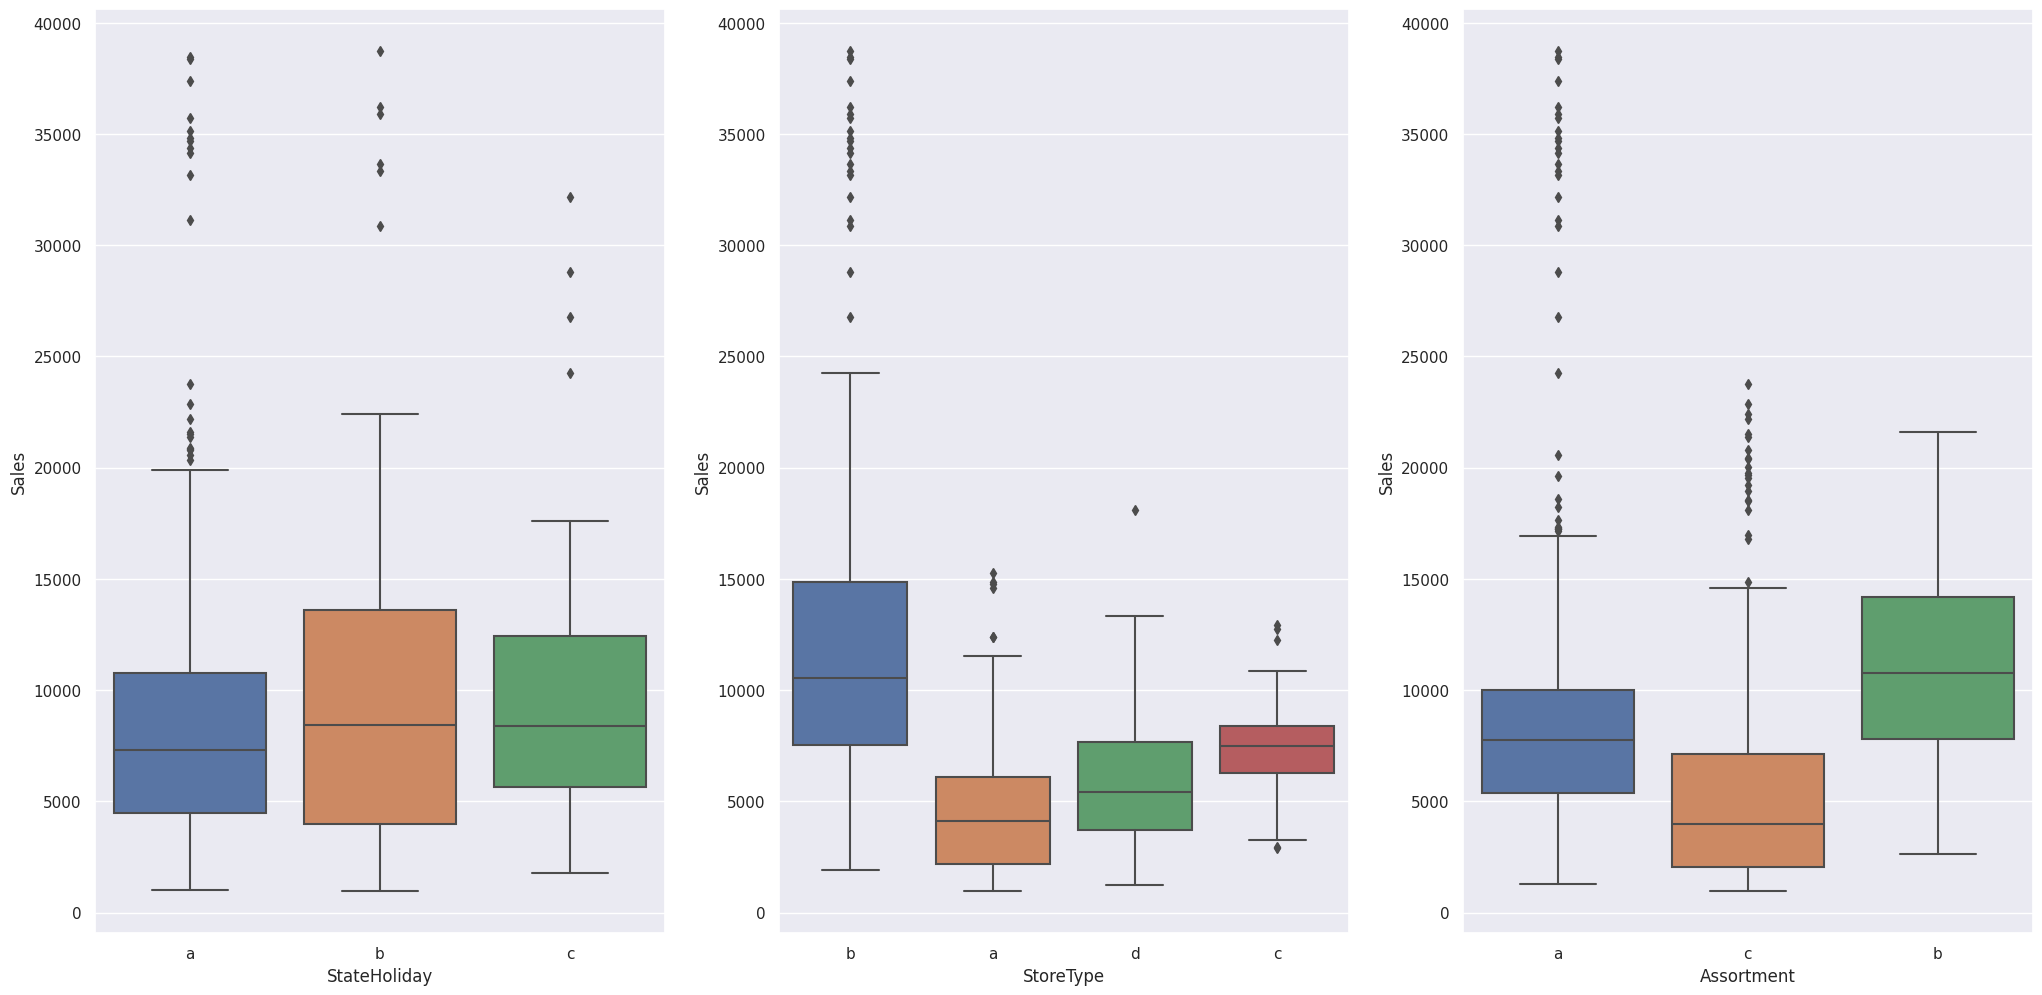

In [25]:
#Mostrar o quanto a variavel resposta(vendas) está distribuída dentro das variáveis categóricas
plt.subplot(1,3,1)
sns.boxplot(x='StateHoliday',y='Sales',data = aux1)

plt.subplot(1,3,2)
sns.boxplot(x='StoreType',y='Sales',data = aux1)

plt.subplot(1,3,3)
sns.boxplot(x='Assortment',y='Sales',data = aux1)

# FEATURE ENGINEERING

### DERIVAÇÃO DE VARIÁVEIS

In [26]:
df2 = df1.copy()

In [27]:
#derivar variáveis
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month
df2['Day'] = df2['Date'].dt.day
df2['WeekOfYear'] = df2['Date'].dt.weekofyear
df2['YearWeek'] = df2['Date'].dt.strftime("%Y-%W")

#nova coluna CompetitionSince criada com dados do CompetitionOpenSinceYear e CompetitionOpenSinceMonth
df2['CompetitionSince'] = df2.apply(lambda x: datetime.datetime(year = x['CompetitionOpenSinceYear'],month=x['CompetitionOpenSinceMonth'],day=1),axis=1)

#periodo de presença de competidores em meses
#apply(lambda x: x.days) para limpar as informações da diferença
df2['CompetitionTimeMonth'] = ((df2['Date']-df2['CompetitionSince'])/30).apply(lambda x: x.days).astype(int)

#período da promo2 ano-semana (ajuste da formatação em string)
df2['Promo2Since'] = df2['Promo2SinceYear'].astype(str)+'-'+df2['Promo2SinceWeek'].astype(str)

#strptime(<string a ser convertida>, <formato>) converte str para datetime
#%w e -1 indica para o compilador segunda-feira como dia da semana
#subtração de 7 dias para nao dar valores negativos para datas promoções recentes(a menos de 1 semana)
df2['Promo2Since'] = df2['Promo2Since'].apply(lambda x: datetime.datetime.strptime(x + '-1',"%Y-%W-%w"))

#período da promo2 em semanas
df2['Promo2TimeWeek'] = ((df2['Date']-df2['Promo2Since'])/7).apply(lambda x: x.days).astype(int)

In [28]:
#adicionar a descrição dos dados para melhor visualização
df2['Assortment'] = df2['Assortment'].apply(lambda x: 'Basic' if x == 'a' 
                                                 else 'Extra' if x == 'b' 
                                                 else 'Extended')

df2['StateHoliday'] = df2 ['StateHoliday'].apply(lambda x: 'PublicHoliday' if x == 'a' 
                                                      else 'EasterHoliday' if x == 'b' 
                                                      else 'Christmas'     if x == 'c' 
                                                      else 'RegularDay')

### FILTRAGEM DE LINHAS E COLUNAS

In [29]:
df2.shape

(949194, 29)

In [30]:
#filtragem de linhas e colunas
df3 = df2.copy()

#lojas abertas e com a presença de valores da variável resposta
df3 = df3[(df3['Open']!= 0 ) & (df3['Sales']>0)]

#retirada de colunas ja derivadas e colunas usadas como mascara
#
dropMap = ['Customers','Open','PromoInterval','MonthMap']
df3 = df3.drop(dropMap,axis=1)
df3.shape

(785727, 25)

# ANÁLISE EXPLORATÓRIA DE DADOS

###  ANÁLISE UNIVARIADA (VARIÁVEL RESPOSTA )

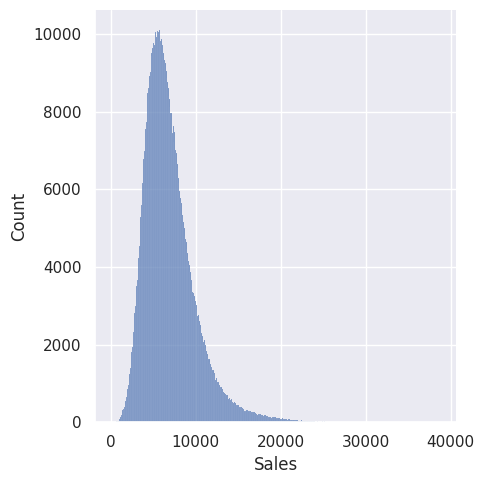

In [31]:
df4 = df3.copy()
sns.displot(df4['Sales']);

### ANÁLISE BIVARIADA (VARIÁVEL RESPOSTA x OUTRAS FEATURES)

##### VENDAS x SORTIMENTO DAS LOJAS

<AxesSubplot: xlabel='Assortment', ylabel='count'>

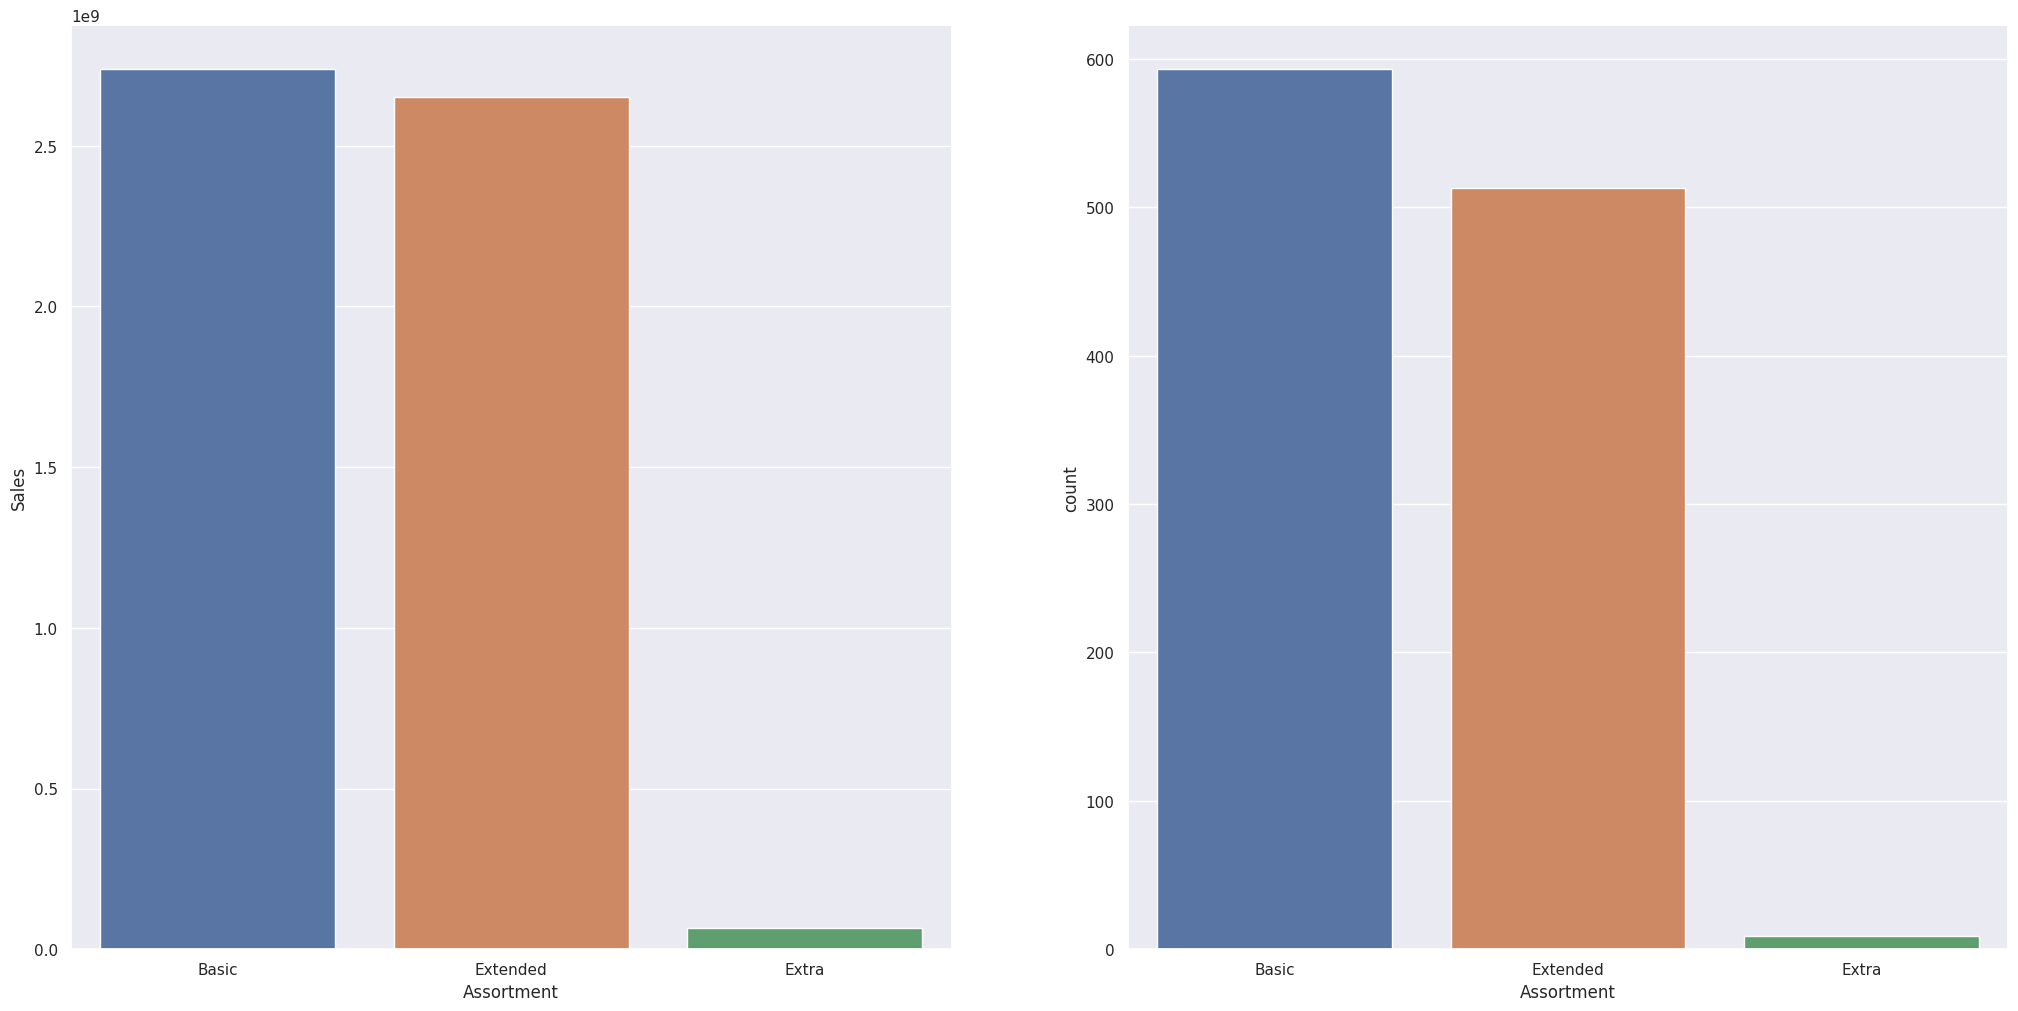

In [32]:
plt.subplot(1,2,1)
#volume de vendas por sortimento
aux1 = df4[['Assortment','Sales']].groupby('Assortment').sum().reset_index()
sns.barplot( x='Assortment', y='Sales', data=aux1 );

plt.subplot(1,2,2)
#quantidade de lojas por sortimento
aux2 = df4.drop_duplicates(subset=['Store'])
sns.countplot(x=aux2['Assortment'])

<AxesSubplot: xlabel='YearWeek'>

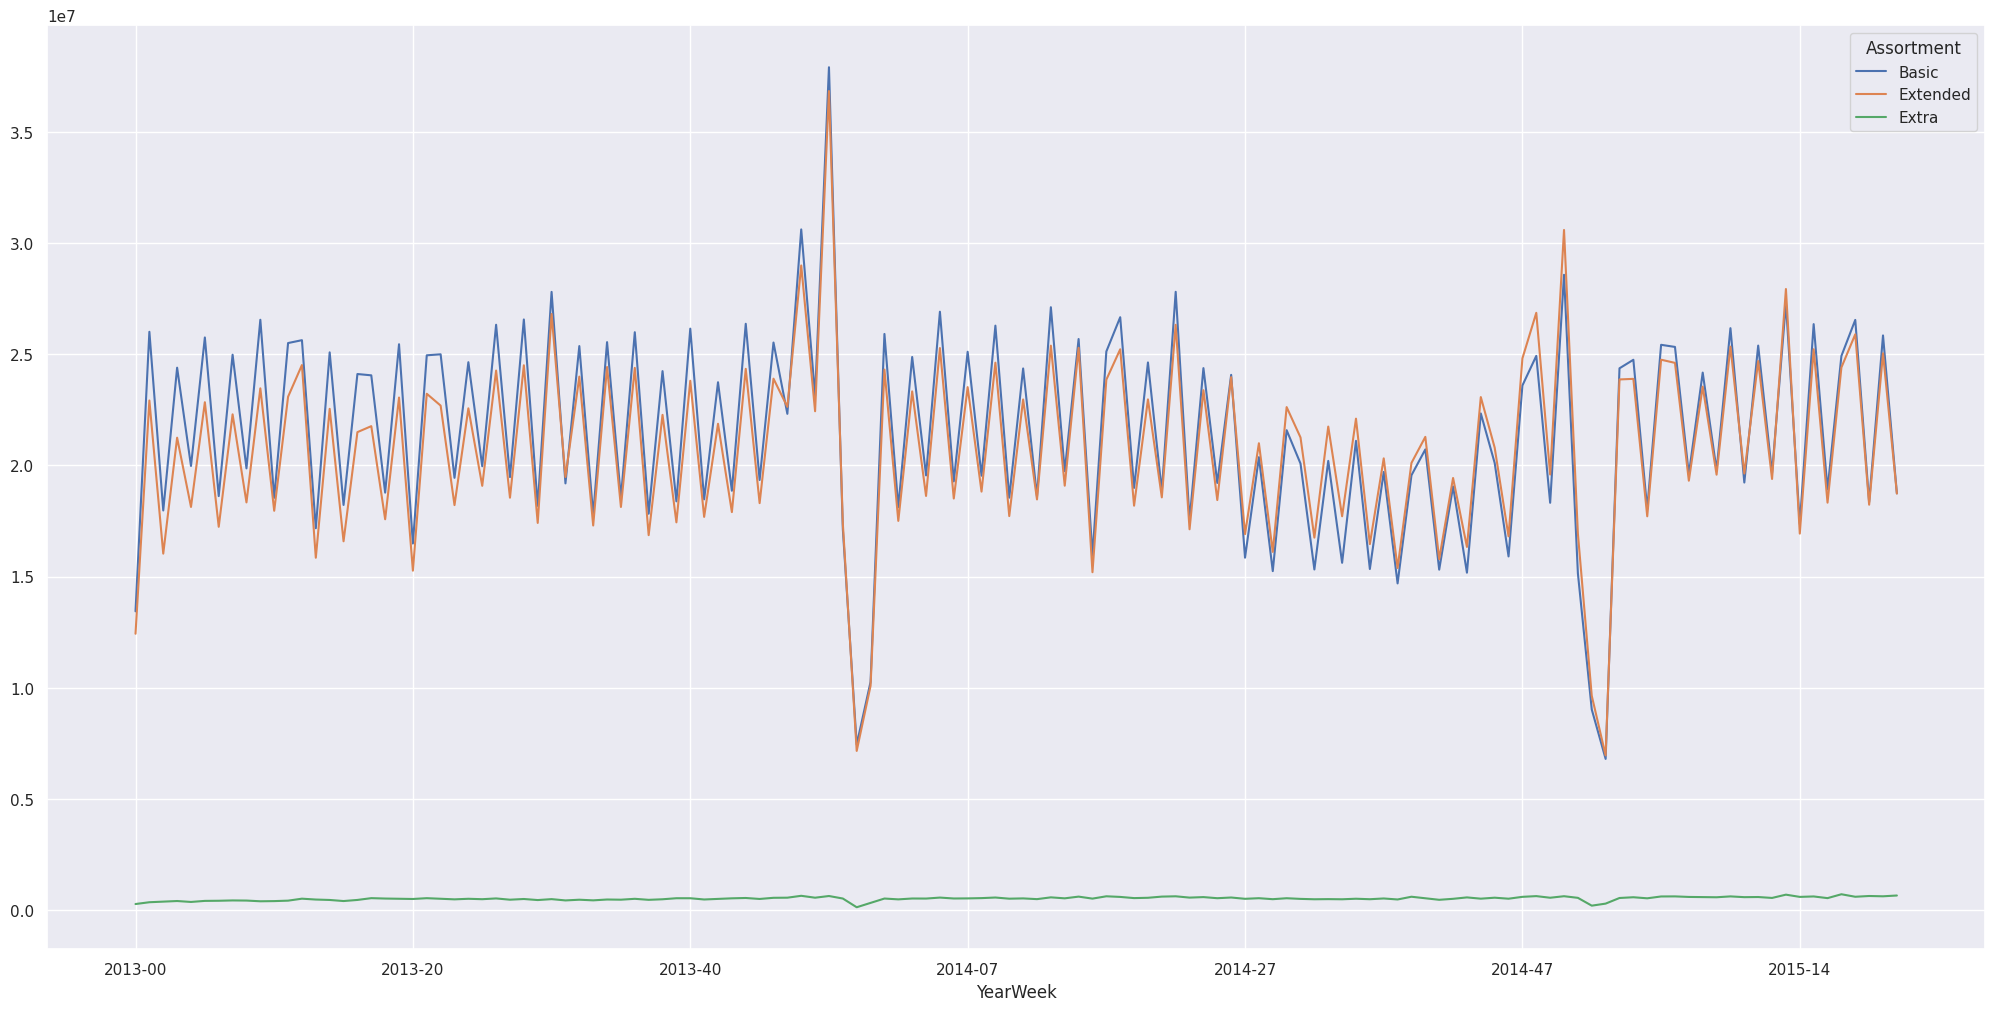

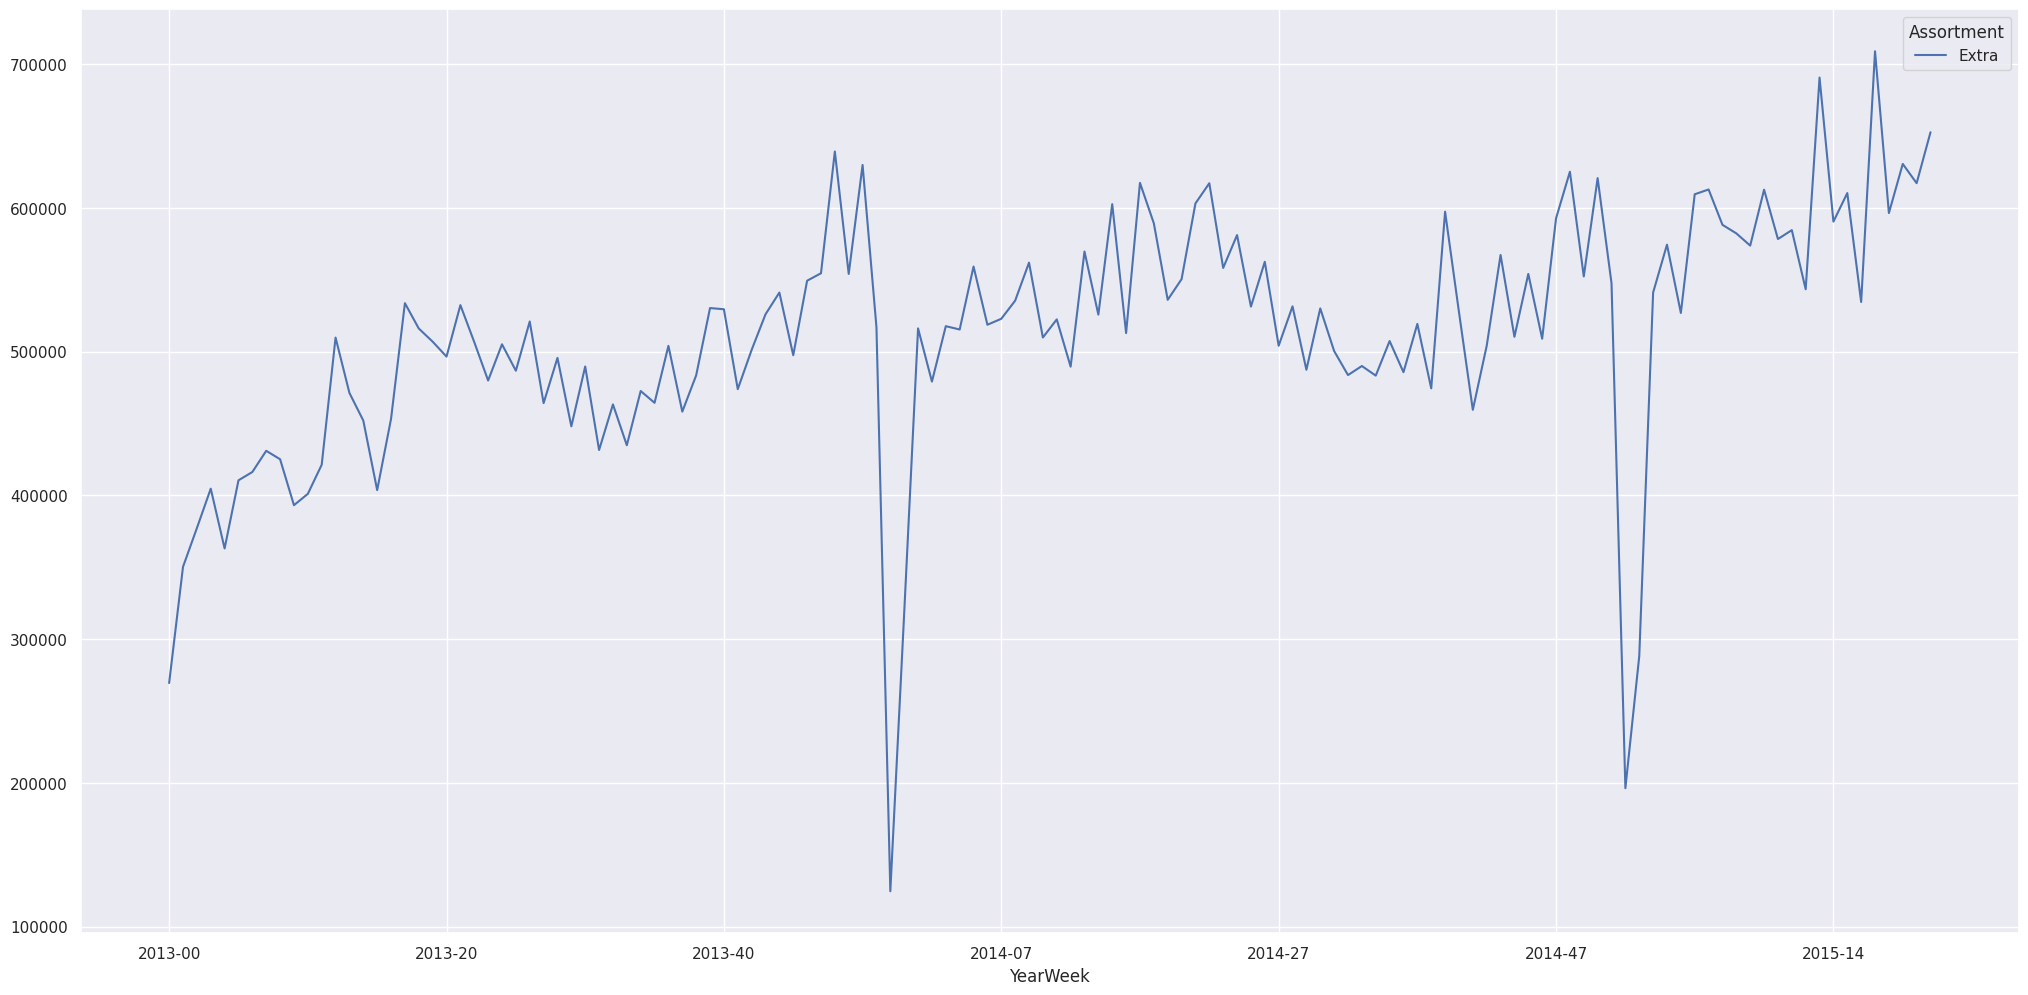

In [33]:
#Comportamento ao longo do tempo
aux2 = df4[['YearWeek','Assortment','Sales']].groupby(['YearWeek','Assortment']).sum().reset_index()
aux2.pivot(index = 'YearWeek',columns='Assortment',values='Sales').plot()

aux3 = aux2[aux2['Assortment']=='Extra']
aux3.pivot(index = 'YearWeek',columns='Assortment',values='Sales').plot()

##### VENDAS x DISTÂNCIA DO COMPETIDOR

In [34]:
df4['CompetitionDistance'].agg(["mean","median","std","min","max","skew","kurtosis"])

mean          5702.875324
median        2330.000000
std           9158.193983
min             20.000000
max         100000.000000
skew             4.600909
kurtosis        34.480618
Name: CompetitionDistance, dtype: float64

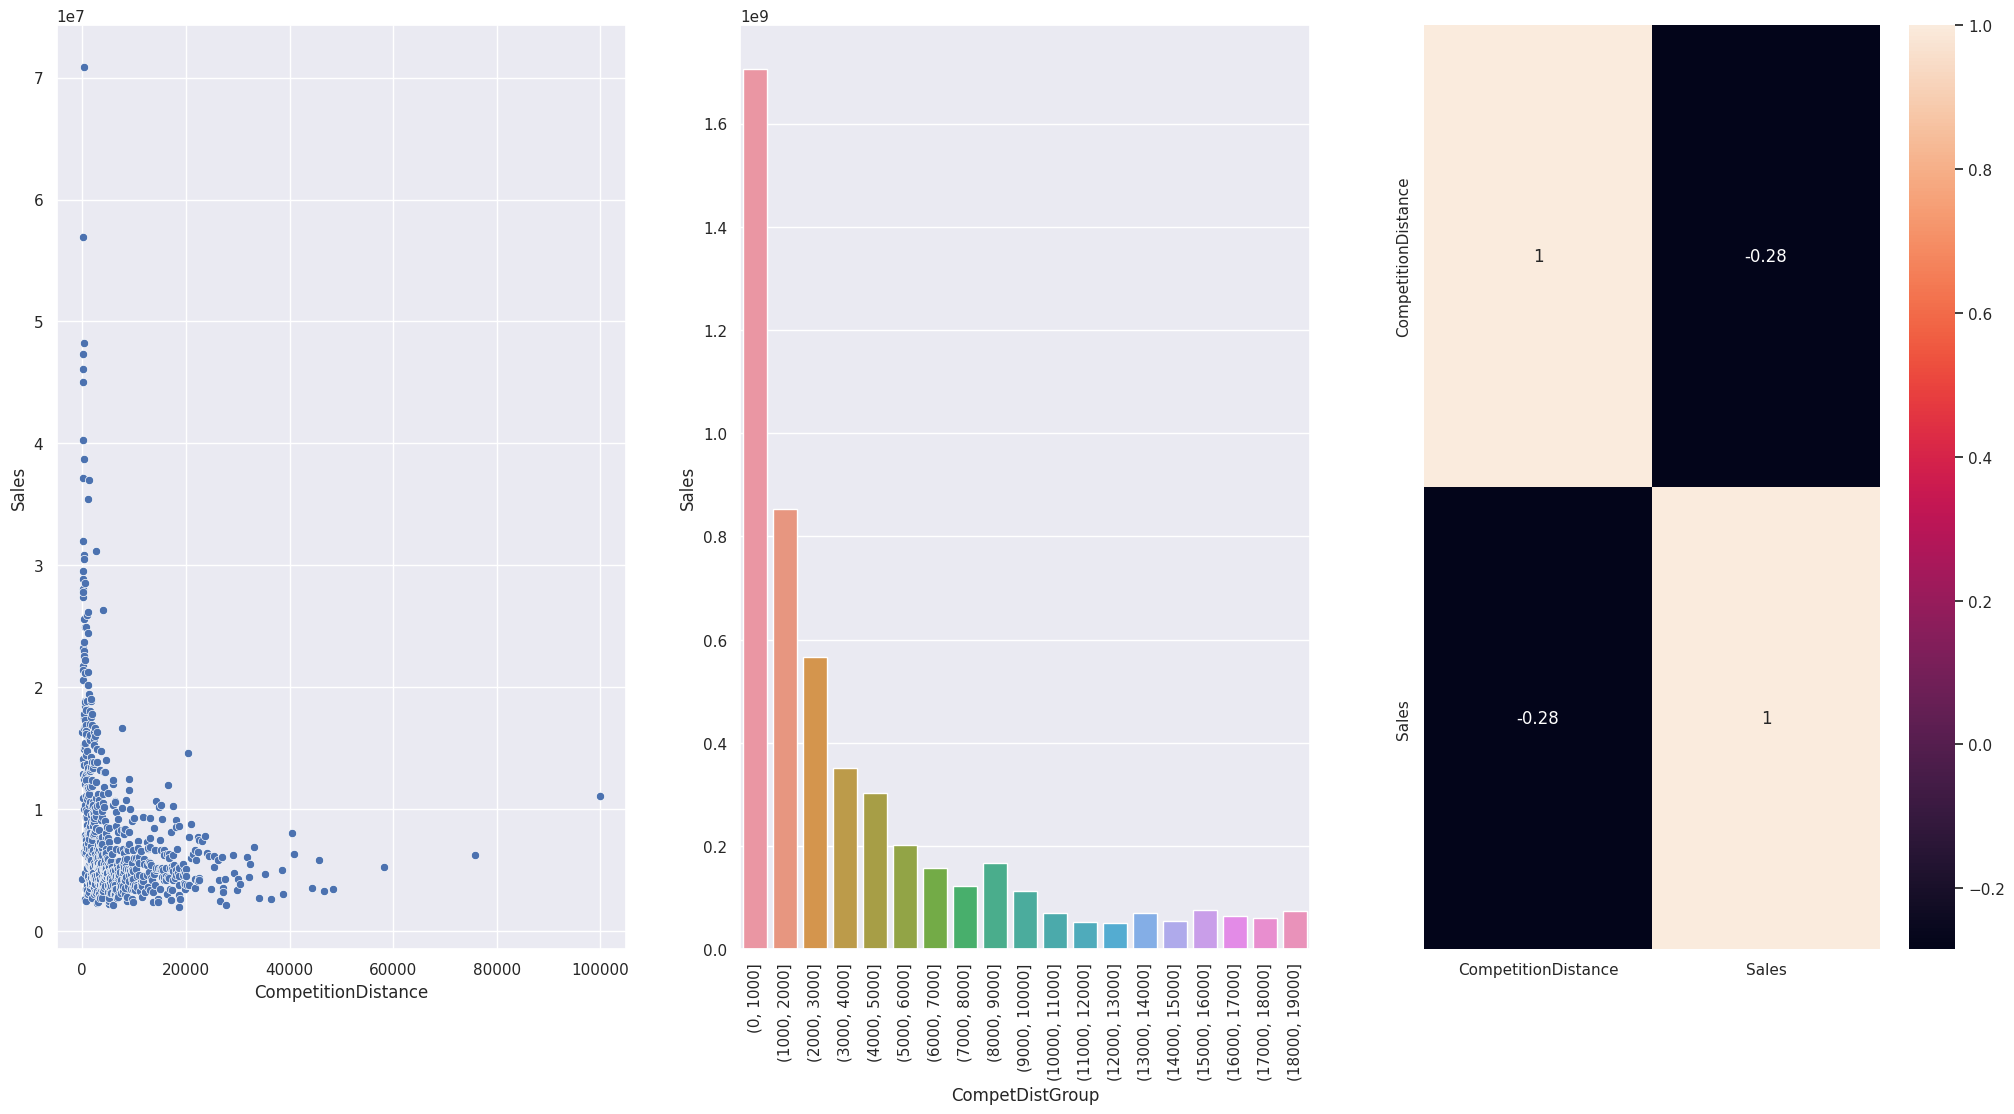

In [35]:
aux1 = df4[['CompetitionDistance','Sales']].groupby('CompetitionDistance').sum().reset_index()

plt.subplot( 1, 3, 1 )
sns.scatterplot(x='CompetitionDistance', y='Sales', data = aux1)

plt.subplot( 1, 3, 2 )
groups = list( np.arange( 0, 20000, 1000) )
#adicionar a aux1 os valores de distancia categorizados por grupos
aux1['CompetDistGroup'] = pd.cut(aux1['CompetitionDistance'],bins=groups)
aux2 = aux1[['CompetDistGroup','Sales']].groupby('CompetDistGroup').sum().reset_index()
sns.barplot(x = 'CompetDistGroup', y='Sales',data = aux2);
plt.xticks(rotation = 90);

plt.subplot( 1, 3, 3 )
x = sns.heatmap( aux1.corr( method='pearson' ), annot=True );

##### VENDAS x TEMPO COM COMPETIDORES

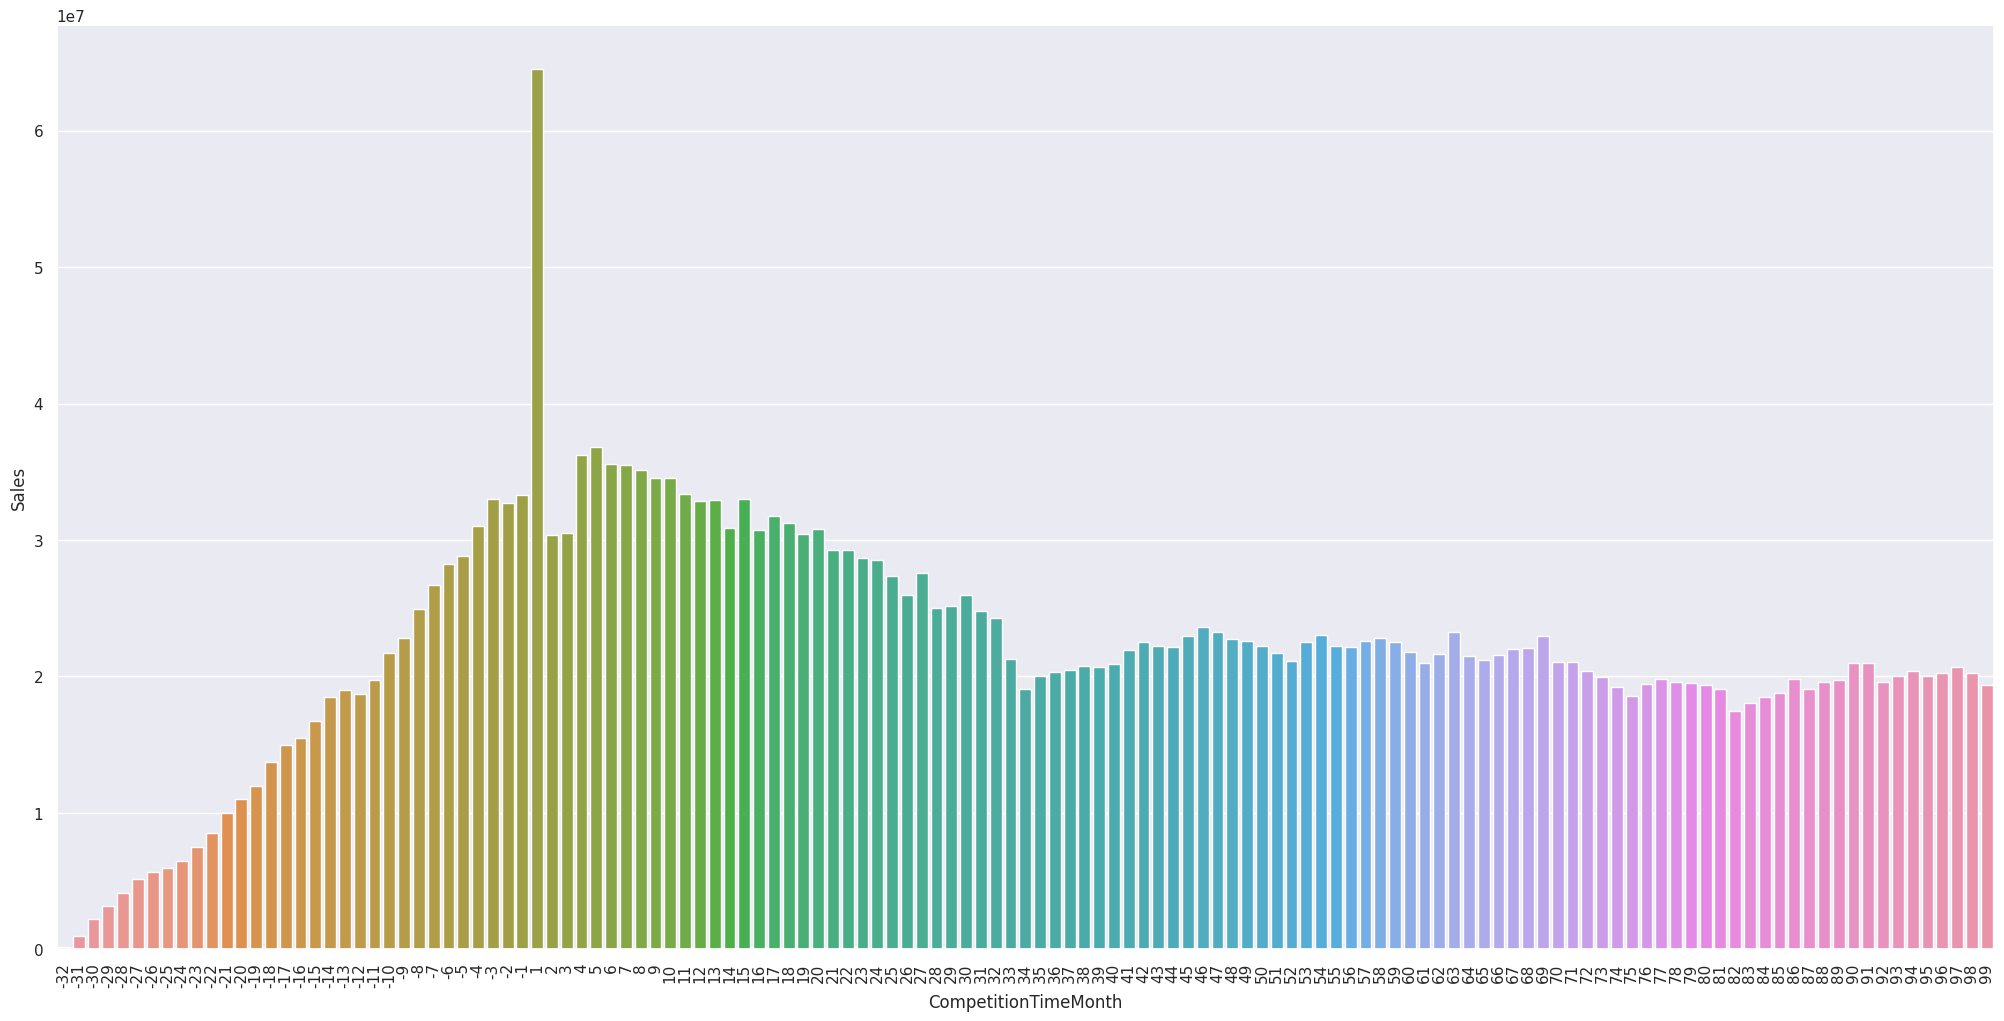

In [36]:
aux1 = df4[['CompetitionTimeMonth', 'Sales']].groupby('CompetitionTimeMonth' ).sum().reset_index()
#vizualização considerando que'CompetitionTimeMonth' -> max = 1405, mean = 40.9, median = 15, skew = 7.37
aux2 = aux1[( aux1['CompetitionTimeMonth'] < 100 ) & (aux1['CompetitionTimeMonth'] != 0 )]
sns.barplot( x='CompetitionTimeMonth', y='Sales', data=aux2 );
plt.xticks( rotation=90 );

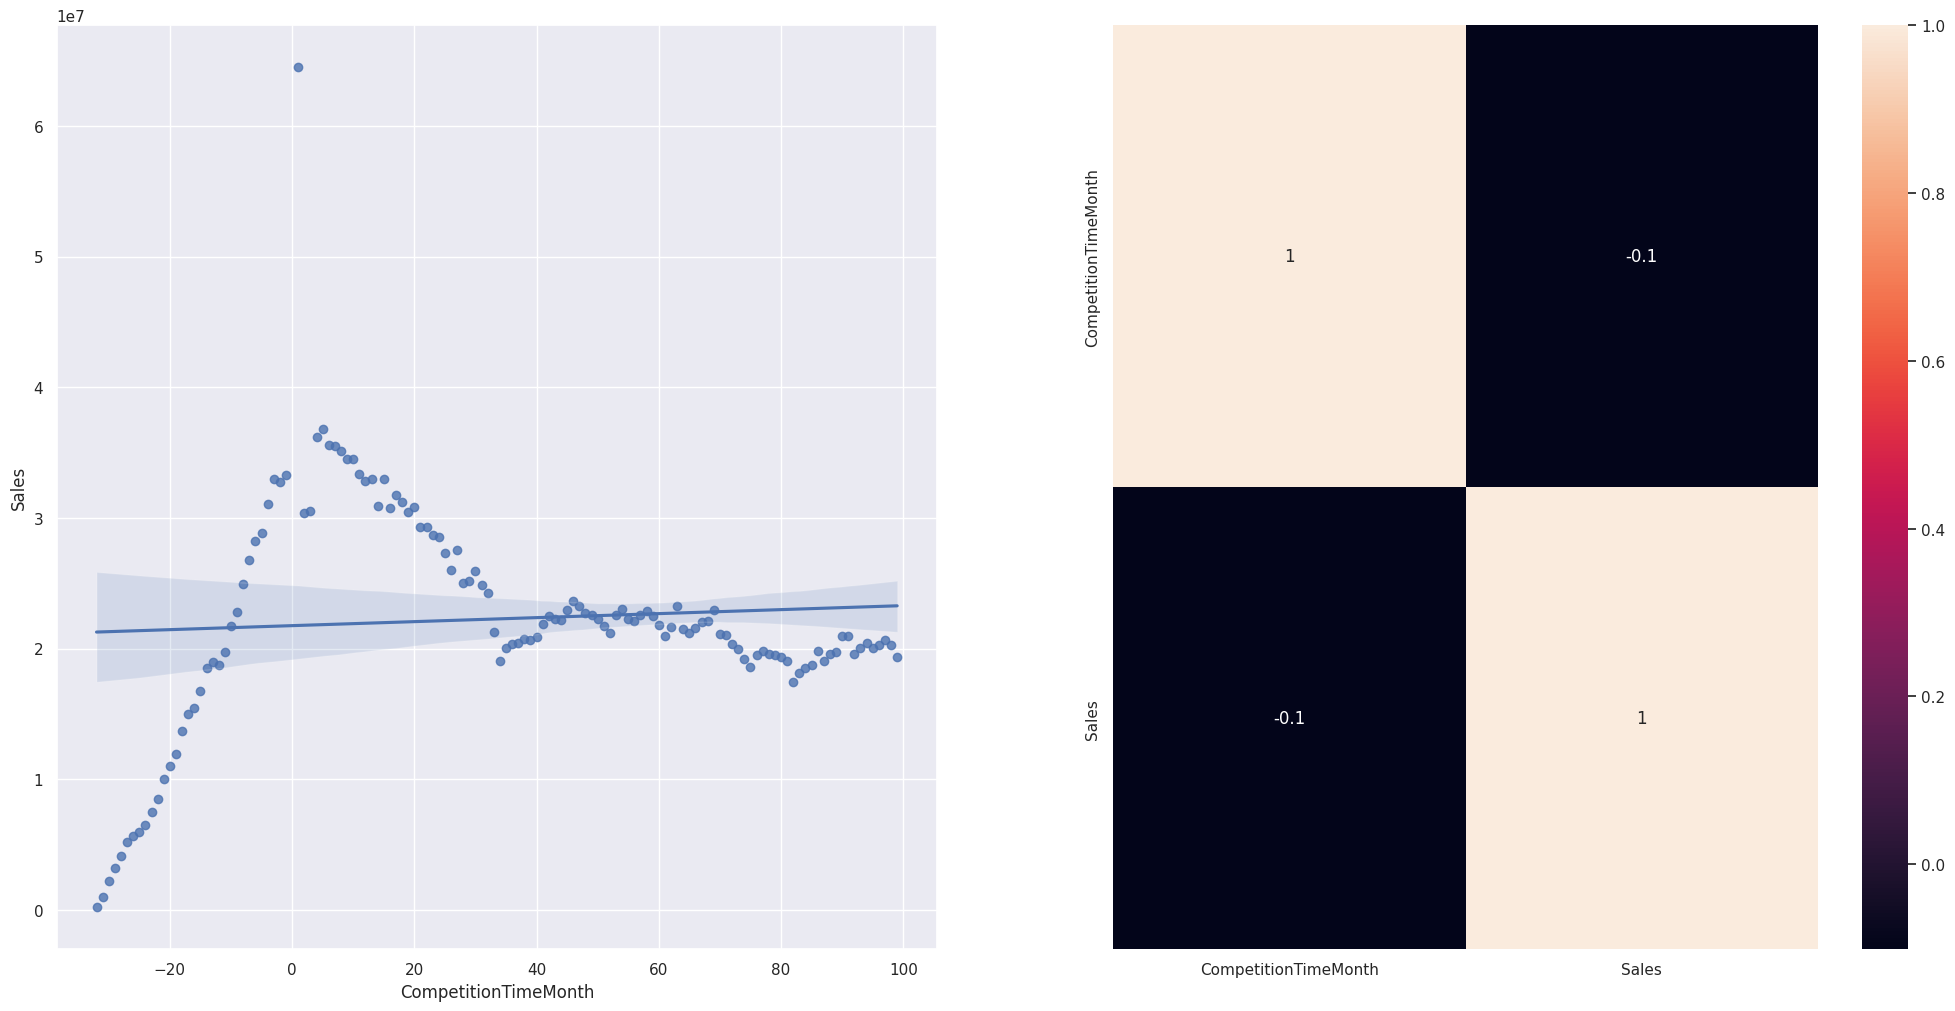

In [37]:
plt.subplot( 1, 2, 1 )
#por se tratar de dados com comportamento não linear, usar apenas para ter noção da tendência
sns.regplot( x='CompetitionTimeMonth', y='Sales', data=aux2 );

plt.subplot( 1, 2, 2 )
sns.heatmap( aux1.corr( method='pearson'), annot=True );

##### VENDAS x PROMOÇÕES

In [38]:
#relação do volume de vendas das lojas que perticiparam dos períodos promocionais
df4[['Promo', 'Promo2', 'Sales']].groupby( ['Promo', 'Promo2'] ).sum().reset_index()

,Promo,Promo2,Sales
0,0,0,1385060979
1,0,1,1200220926
2,1,0,1509201110
3,1,1,1359011619


##### VENDAS x FERIADOS

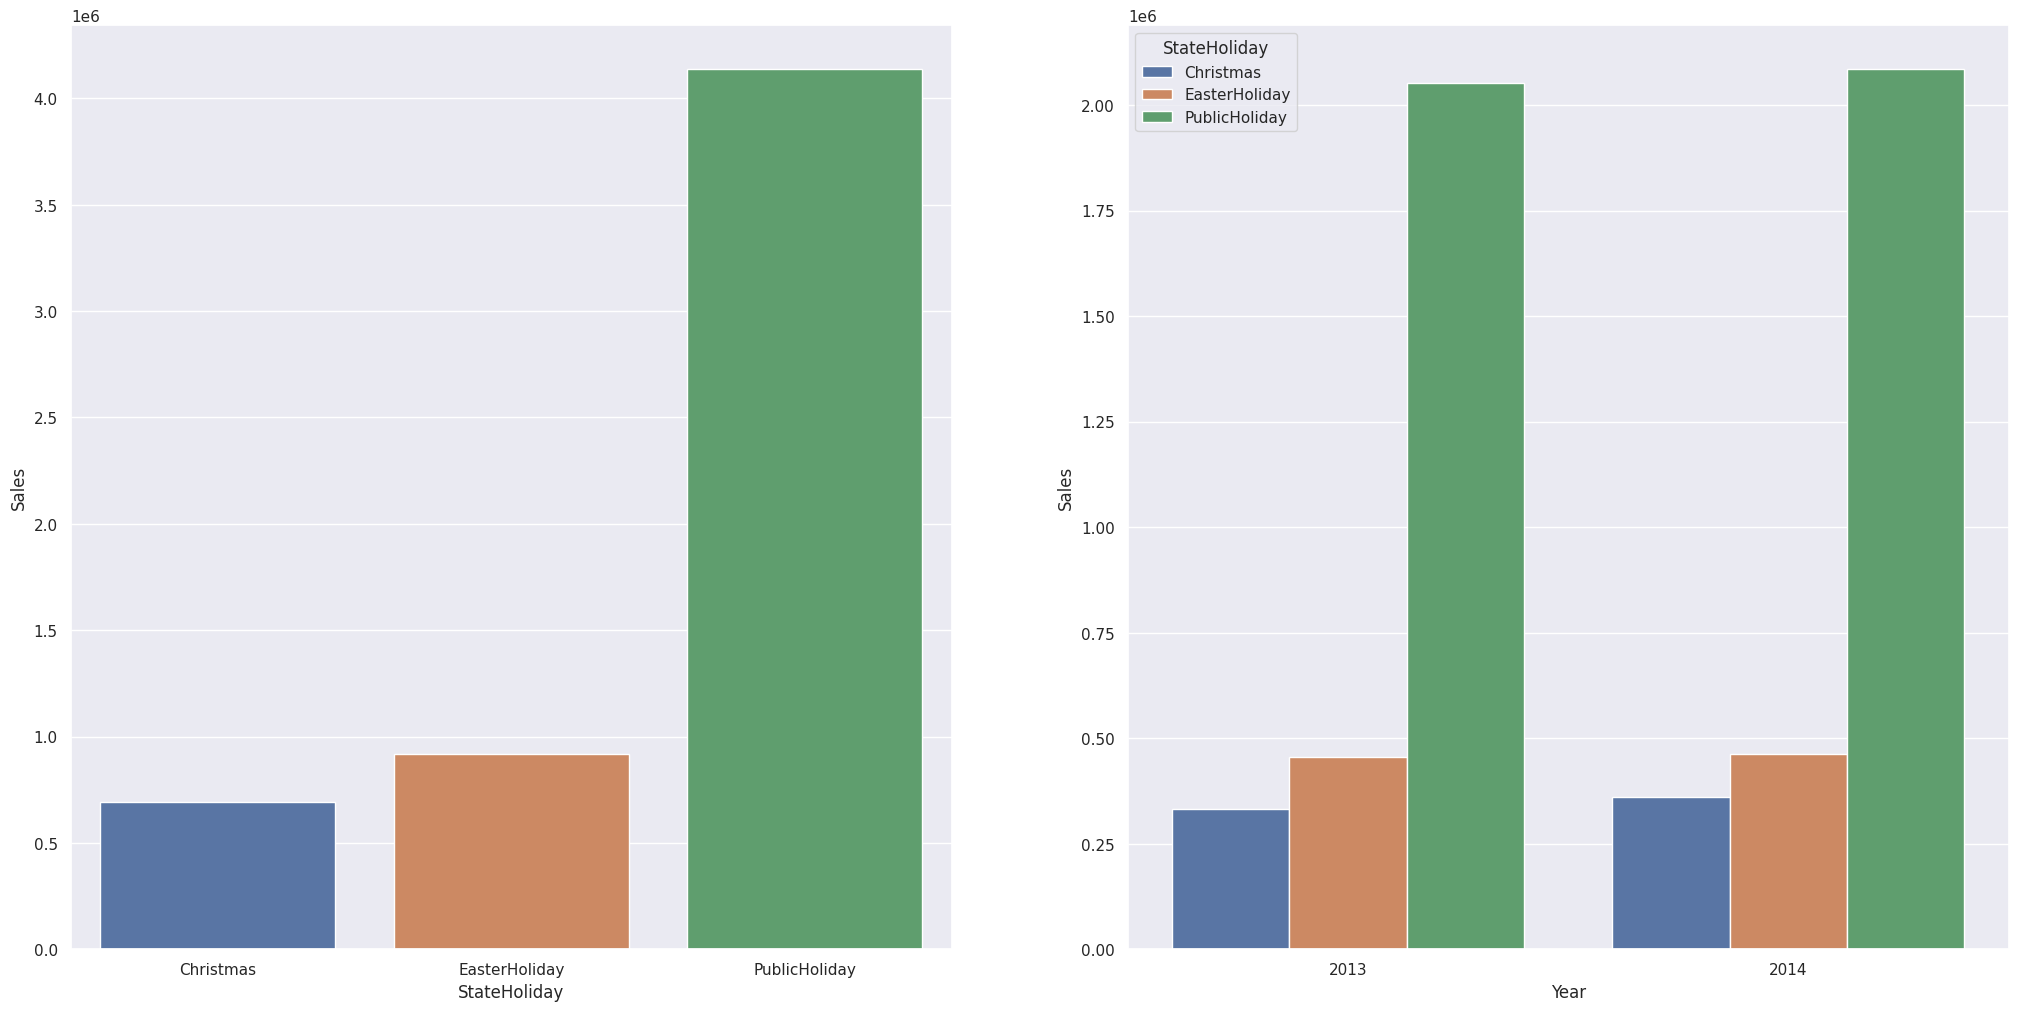

In [39]:
#filtrando feriados e anos completos(visto que a data mais recente(2015-05-31) não tem as vendas de natal do ano de 2015 ainda)
#data mais antiga: 2013-01-01
aux = df4[(df4['StateHoliday'] != 'RegularDay') & (df4['Year'] < 2015)]
plt.subplot( 1, 2, 1 )
aux1 = aux[['StateHoliday', 'Sales']].groupby( 'StateHoliday' ).sum().reset_index()

sns.barplot( x='StateHoliday', y='Sales', data=aux1 );
plt.subplot( 1, 2, 2 )
aux2 = aux[['Year', 'StateHoliday', 'Sales']].groupby( ['Year','StateHoliday'] ).sum().reset_index()
sns.barplot( x='Year', y='Sales', hue='StateHoliday', data=aux2 );

##### VENDAS x ANOS

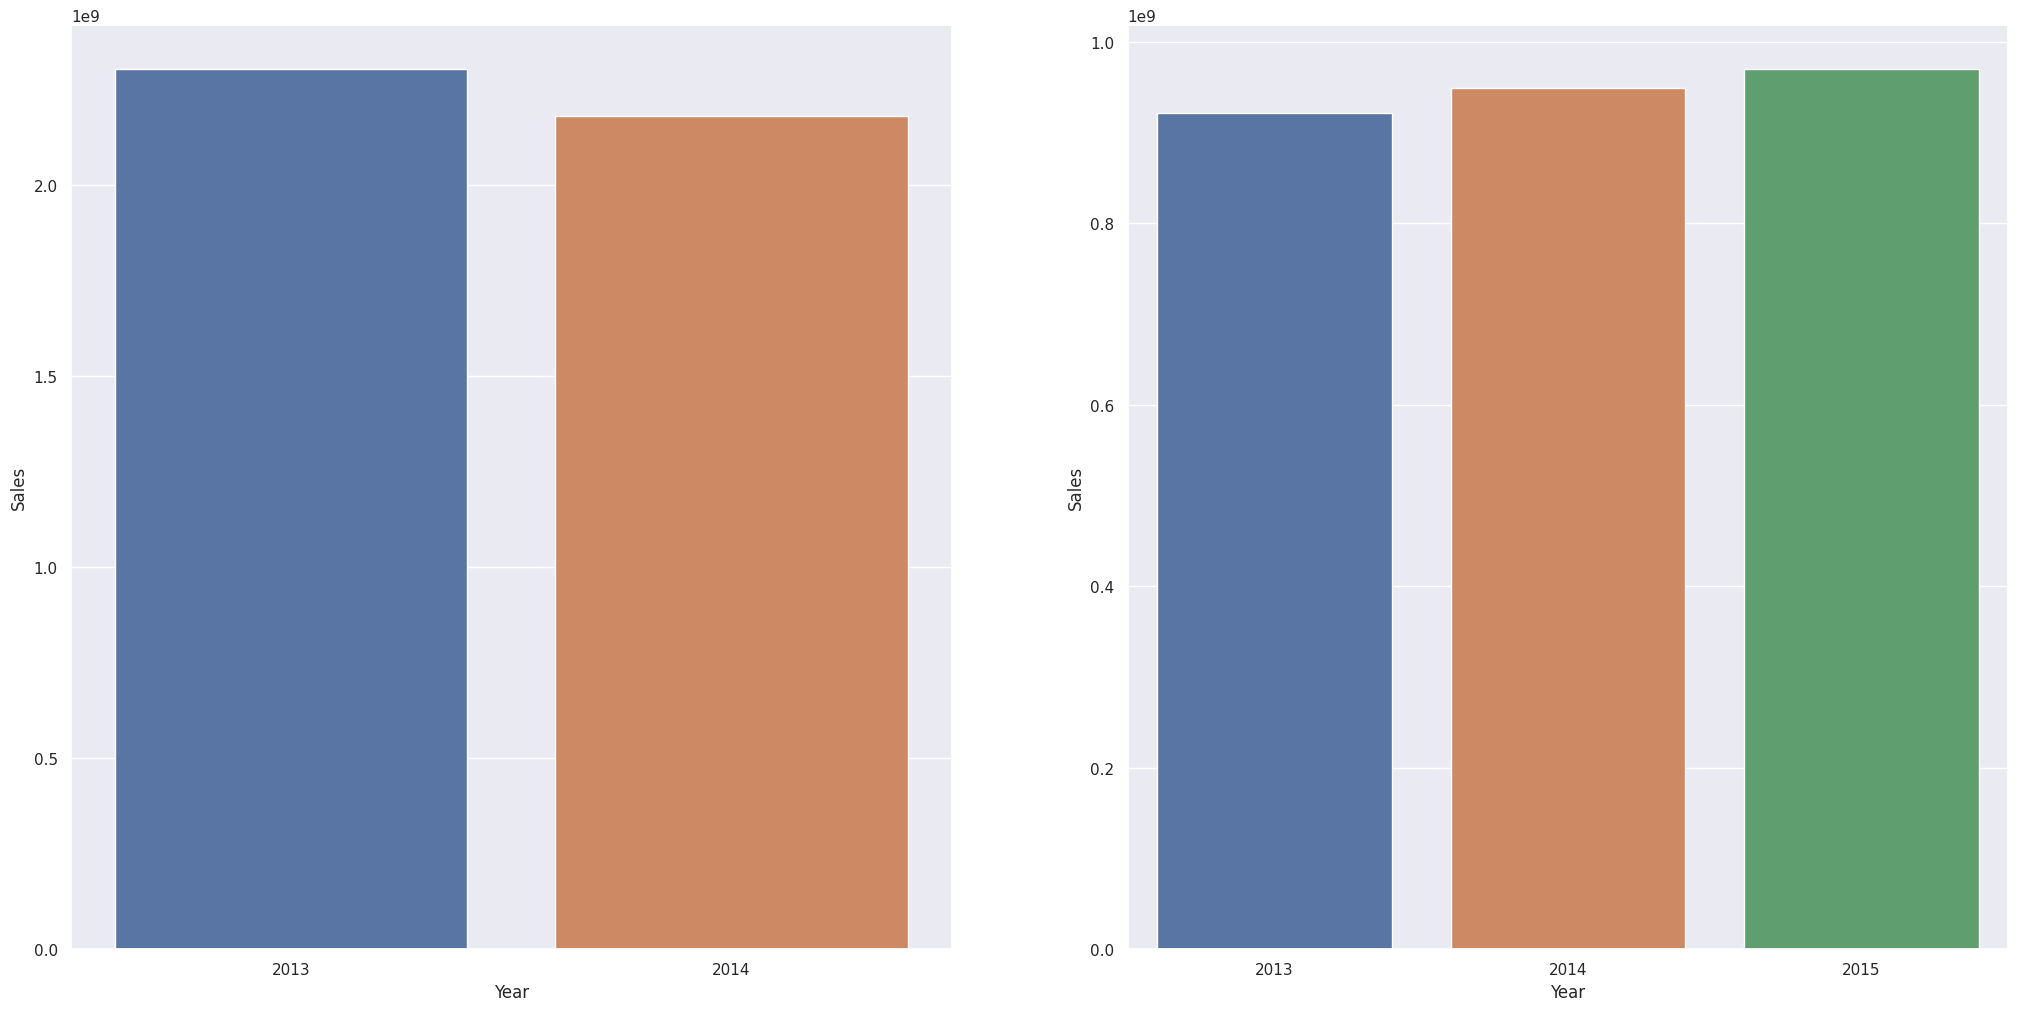

In [40]:
aux1 = df4[(df4['Year']<2015)]
aux1 = aux1[['Year', 'Sales']].groupby('Year').sum().reset_index()

plt.subplot( 1, 2, 1 )
sns.barplot( x='Year', y='Sales', data=aux1 );

#primeiros 5 meses completos, considerando que a data mais recente é 31 de maio de 2015
aux2 = df4[(df4['Month']<6)]
aux2 = aux2[['Year', 'Sales']].groupby('Year').sum().reset_index()
plt.subplot( 1, 2, 2 )
sns.barplot( x='Year', y='Sales', data=aux2 );

##### VENDAS x MESES

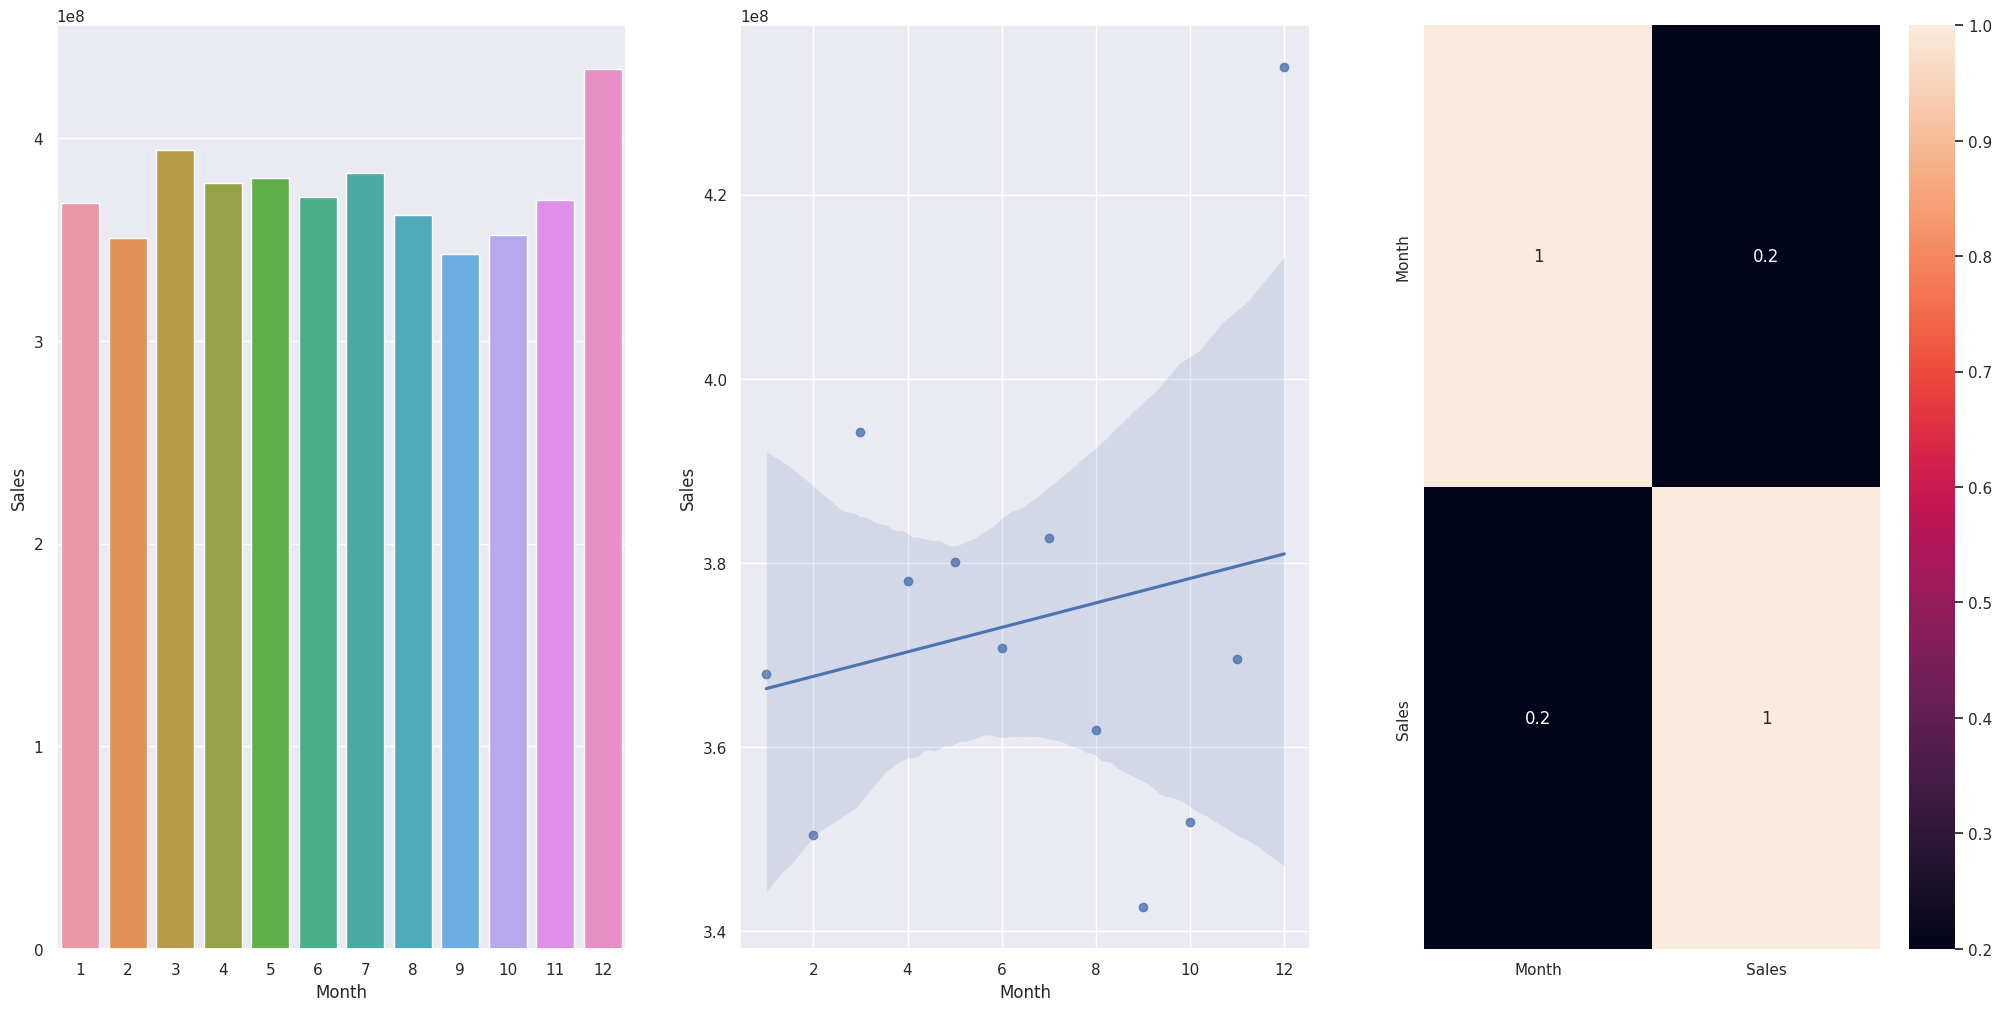

In [41]:
#filtro para anos completos

aux1 = df4[(df4['Year']<2015)]
aux1 = aux1[['Month', 'Sales']].groupby('Month').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot( x='Month', y='Sales', data=aux1 );

plt.subplot(1,3,2)
sns.regplot( x='Month', y='Sales', data=aux1 );

plt.subplot(1,3,3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

##### VENDAS x DIAS DA SEMANA

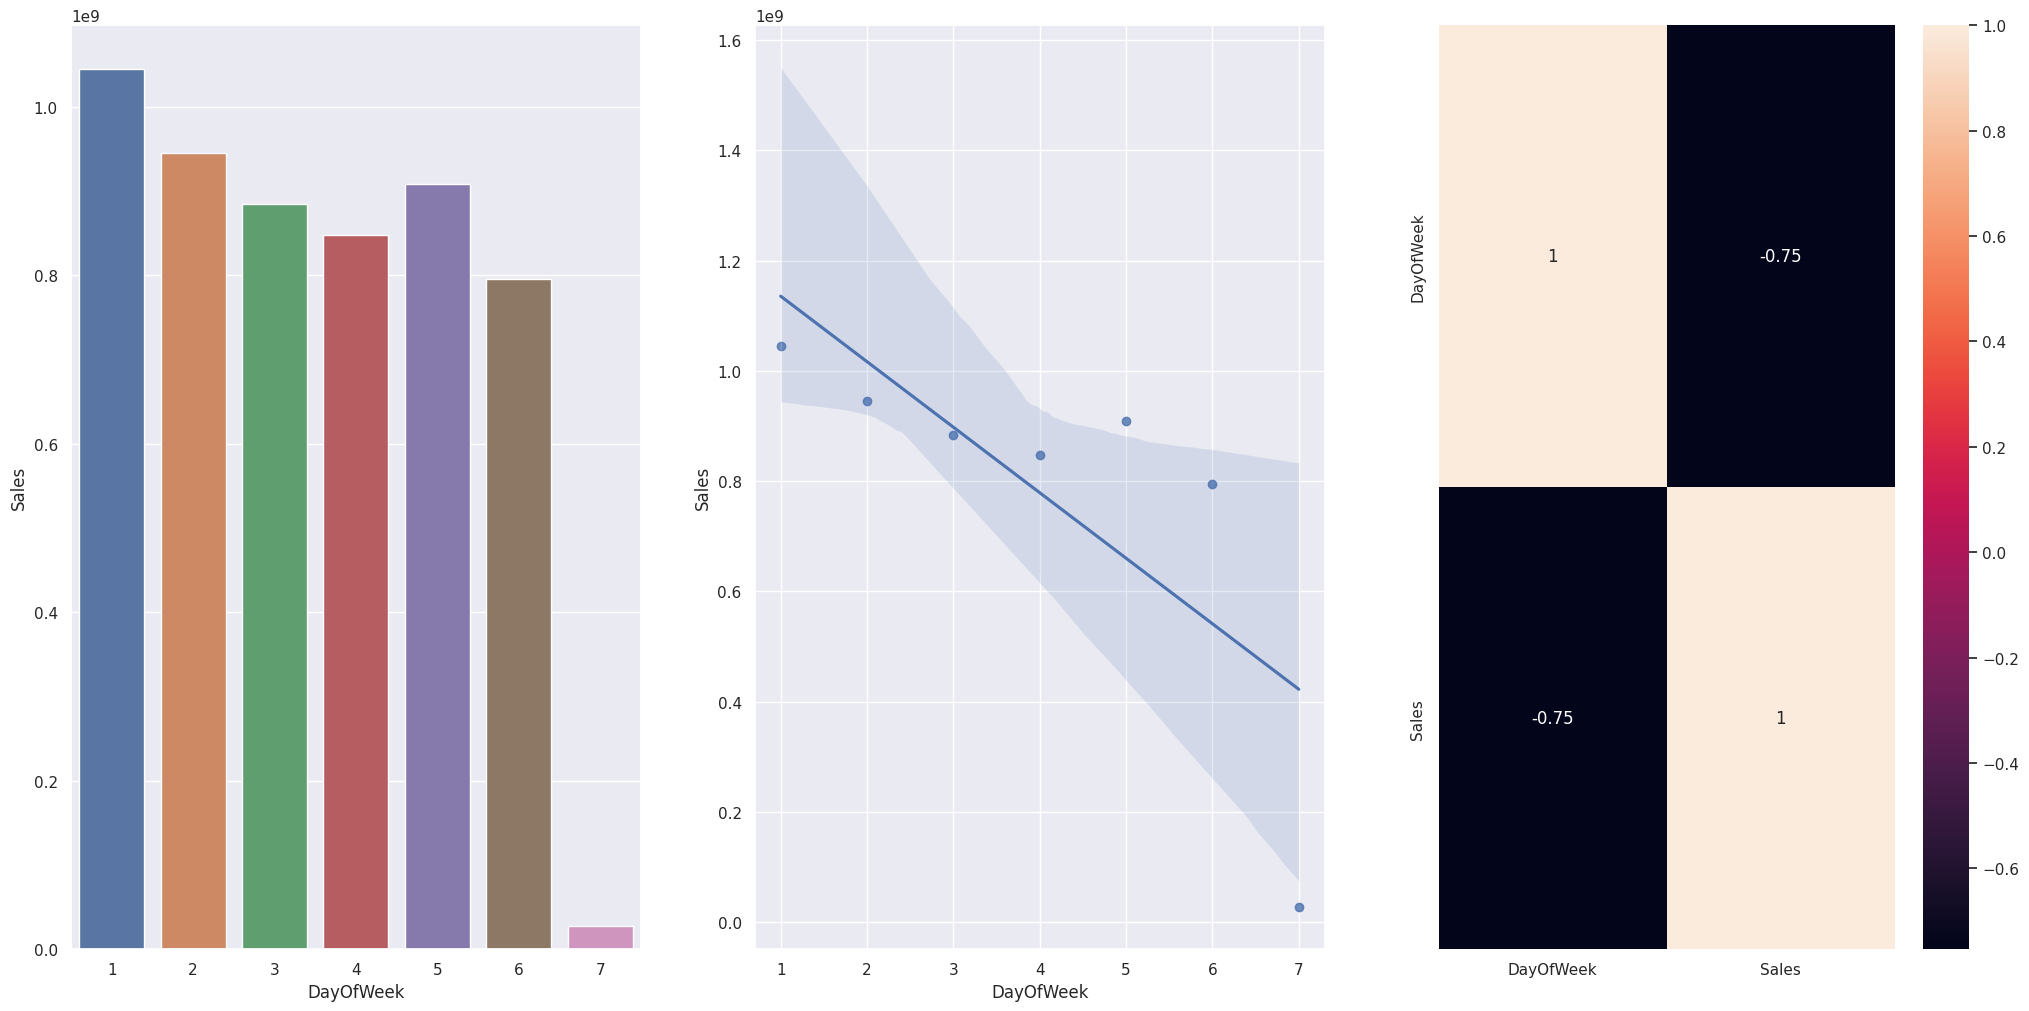

In [42]:
aux1 = df4[['DayOfWeek', 'Sales']].groupby('DayOfWeek').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot( x='DayOfWeek', y='Sales', data=aux1 );

plt.subplot(1,3,2)
sns.regplot( x='DayOfWeek', y='Sales', data=aux1 );

plt.subplot(1,3,3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### ANÁLISE MULTIVARIADA

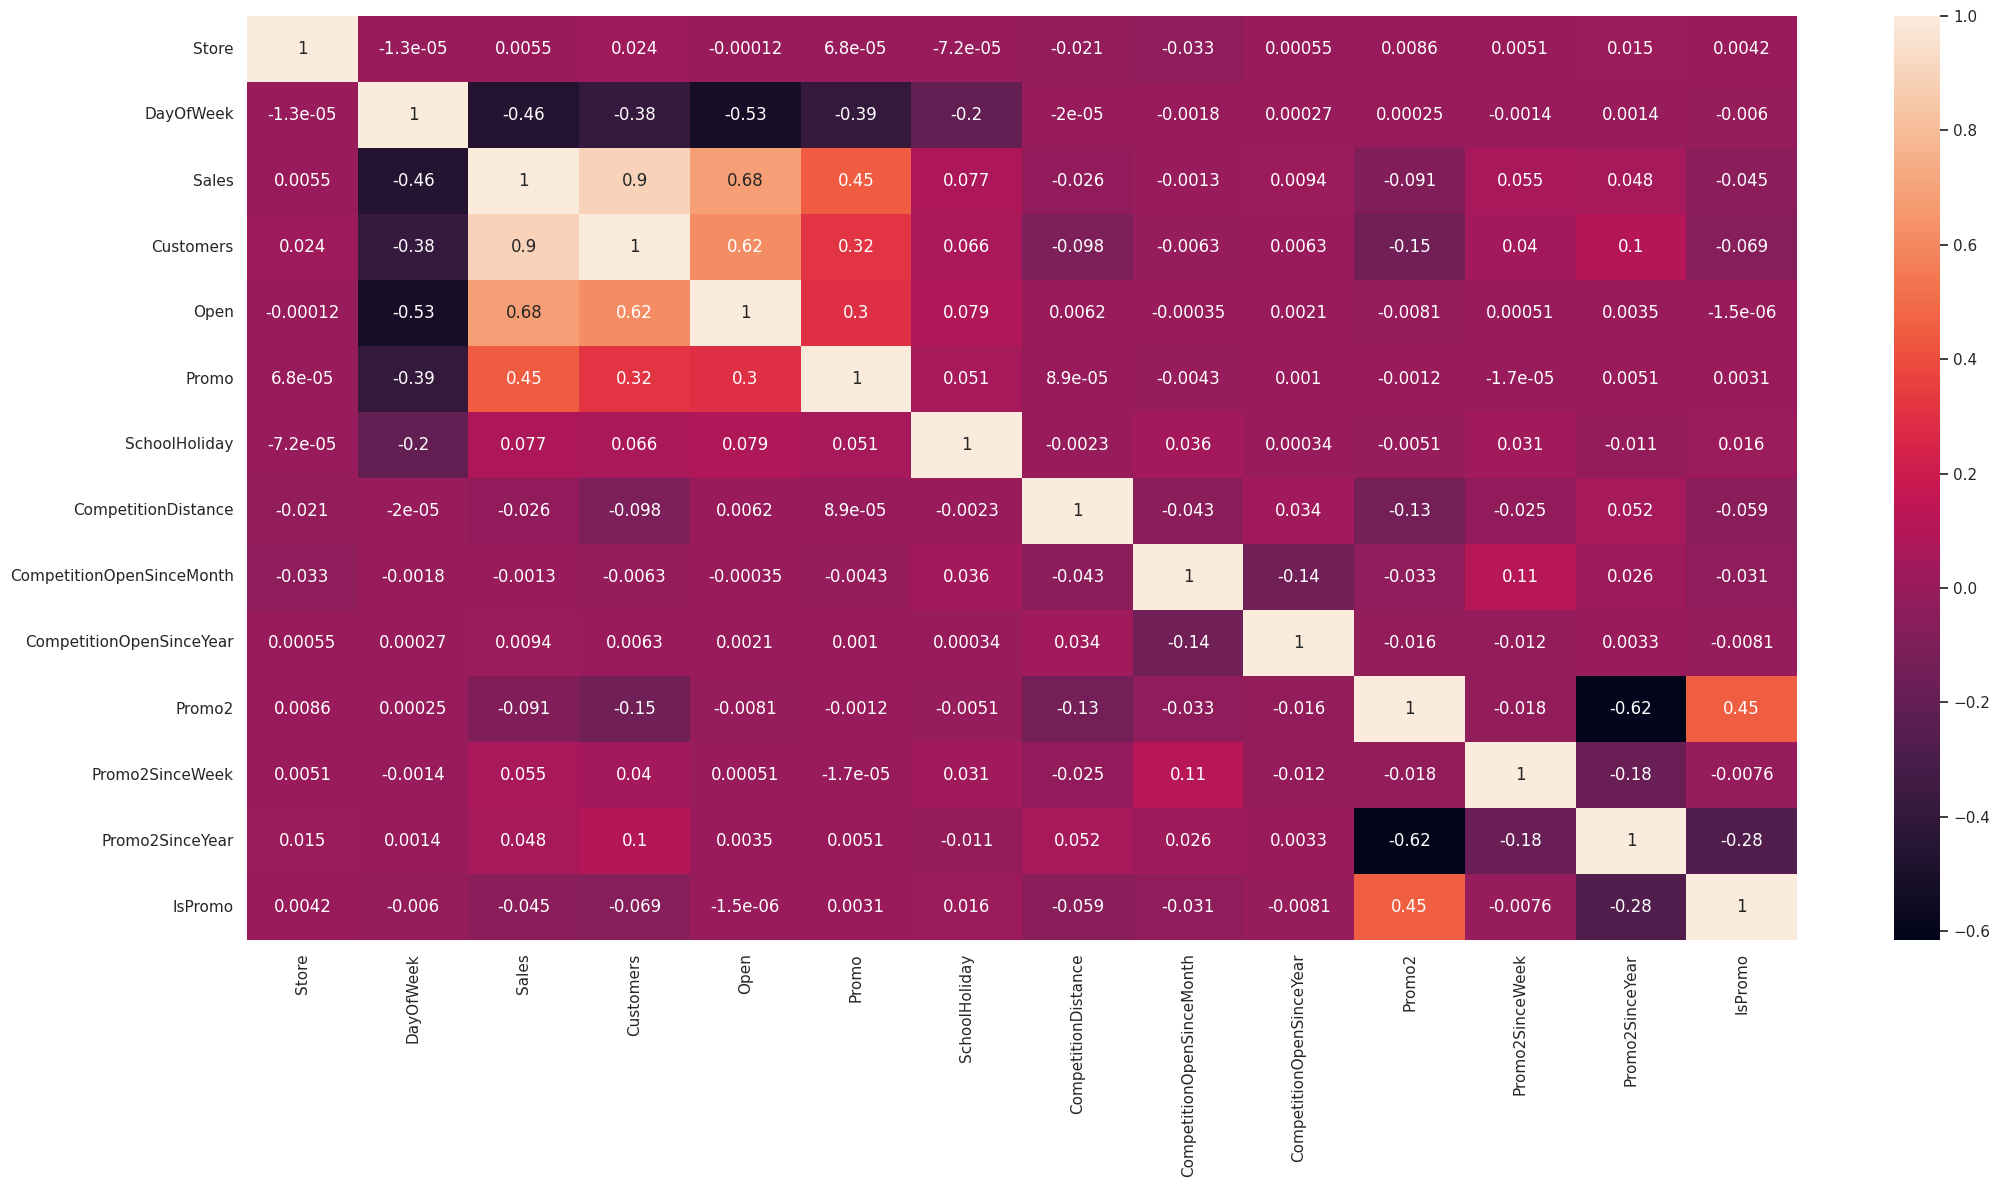

In [43]:
#matriz de correlação para variáveis numéricas
correlation = numAtt.corr( method = 'pearson' )
sns.heatmap( correlation, annot = True );

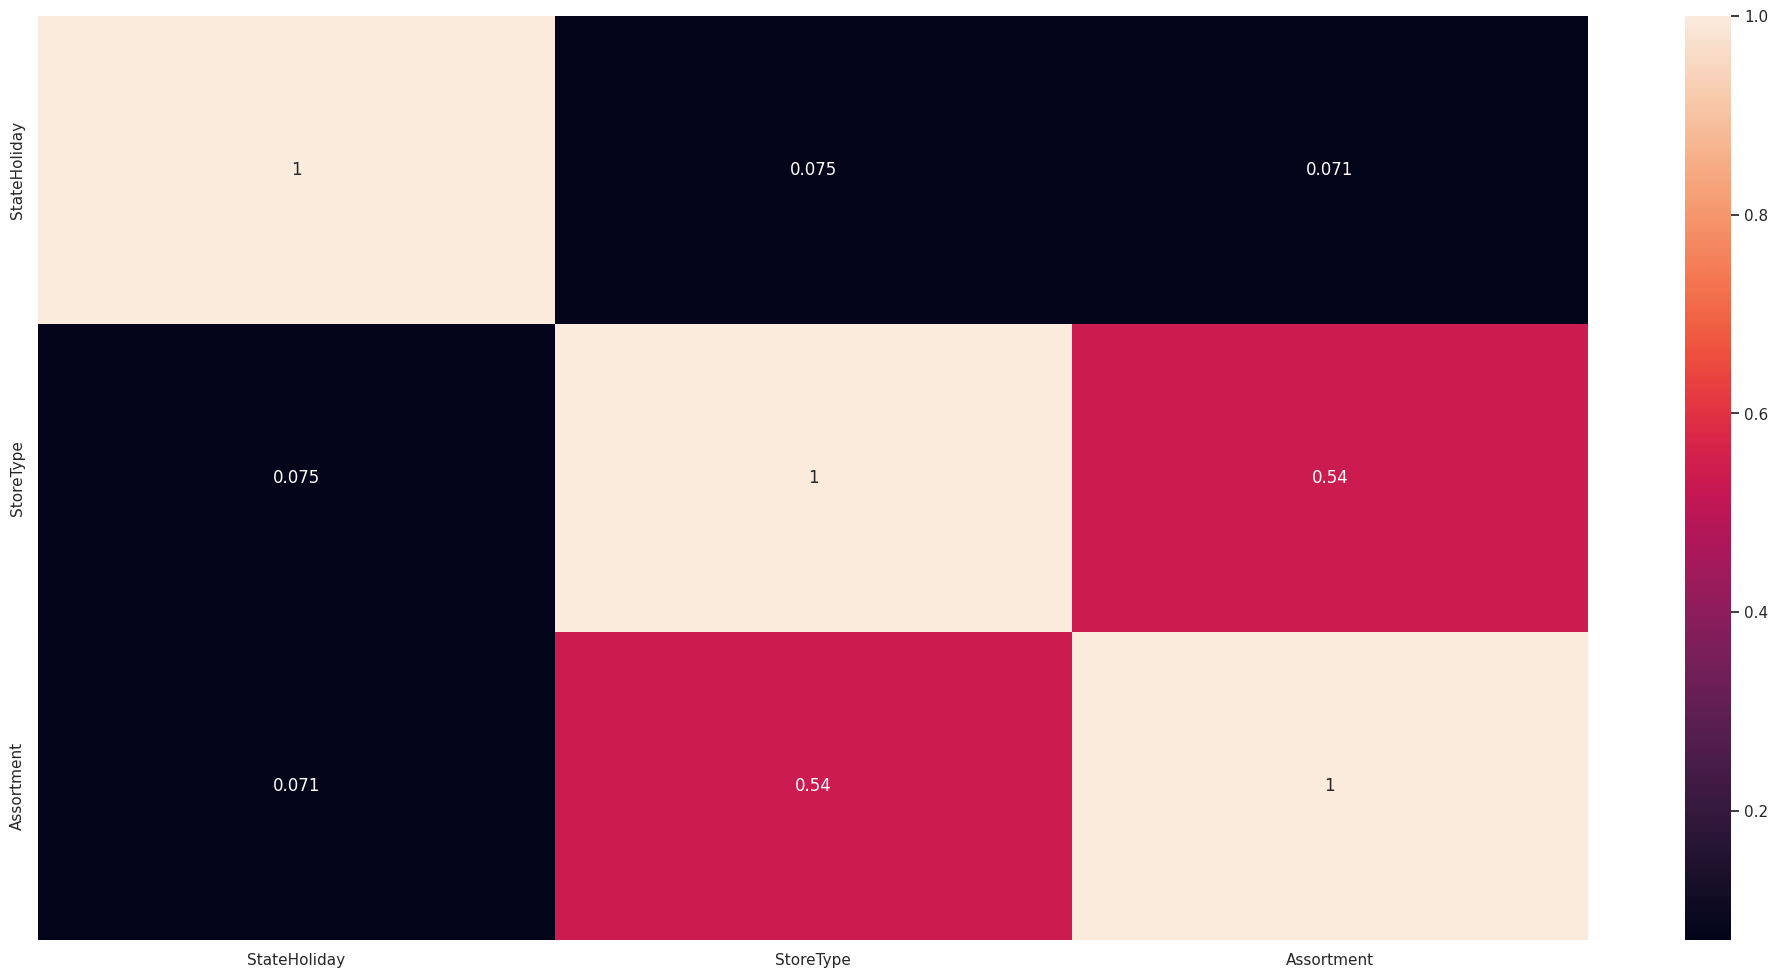

In [44]:
#cramer v (método de correlação para variáveis categóricas)

def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).values#crosstab gera uma tabela de contagem de correspondencia entre as features de entrada
    n = cm.sum()
    r, k = cm.shape
    chi2 = ss.chi2_contingency( cm )[0]#parametro chi quadrado calculado pelo método chi2_contingency da biblioteca stats do scipy
    #correção do bias dos parâmetros
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )

a = df4.select_dtypes( include='object' )
# Calculate cramer V
a1 = cramer_v( a['StateHoliday'], a['StateHoliday'] )
a2 = cramer_v( a['StateHoliday'], a['StoreType'] )
a3 = cramer_v( a['StateHoliday'], a['Assortment'] )
a4 = cramer_v( a['StoreType'], a['StateHoliday'] )
a5 = cramer_v( a['StoreType'], a['StoreType'] )
a6 = cramer_v( a['StoreType'], a['Assortment'] )
a7 = cramer_v( a['Assortment'], a['StateHoliday'] )
a8 = cramer_v( a['Assortment'], a['StoreType'] )
a9 = cramer_v( a['Assortment'], a['Assortment'] )
# Final dataset
d = pd.DataFrame( {'StateHoliday': [a1, a2, a3],
'StoreType': [a4, a5, a6],
'Assortment': [a7, a8, a9] })
d = d.set_index( d.columns )
sns.heatmap( d, annot=True );

# PREPARAÇÃO DOS DADOS

### Rescaling

In [69]:
df5 = df4.copy()
df5['StoreType'].unique()

array(['b', 'a', 'd', 'c'], dtype=object)

In [70]:
#bilbioteca sklearn
rs = RobustScaler()

#rescaling de variáveis numéricas com robust scaler
df5['CompetitionDistance'] = rs.fit_transform( df5[['CompetitionDistance']].values)
df5['CompetitionTimeMonth'] = rs.fit_transform( df5[['CompetitionTimeMonth']].values)
df5['Promo2TimeWeek'] = rs.fit_transform( df5[['Promo2TimeWeek']].values)
df5['Year'] = rs.fit_transform( df5[['Year']].values)

### Transformação de variáveis

In [71]:
#Encoding de variáveis categóricas
#one hot encoding
df5 = pd.get_dummies( df5, prefix=['StateHol'], columns=['StateHoliday'] )

#label encoding de store type(a,b,c,d para 0,1,2,3)
le = LabelEncoder()
df5['StoreType'] = le.fit_transform( df5['StoreType'] )

#ordinal encoding
assortment_dict = {'basic': 1, 'extra': 2, 'extended': 3}
df5['Assortment'] = df5['Assortment'].map( assortment_dict )

In [75]:
#transformação de grandeza da variável resposta
df5['Sales'] = np.log1p( df5['Sales'] )

In [80]:
#tranformação de natureza

# day of week
df5['DayOfWeekSin'] = df5['DayOfWeek'].apply( lambda x: np.sin( x * ( 2. * np.pi/7 ) ) )
df5['DayOfWeekCos'] = df5['DayOfWeek'].apply( lambda x: np.cos( x * ( 2. * np.pi/7 ) ) )

# month
df5['MonthSin'] = df5['Month'].apply( lambda x: np.sin( x * ( 2. * np.pi/12 ) ) )
df5['MonthCos'] = df5['Month'].apply( lambda x: np.cos( x * ( 2. * np.pi/12 ) ) )

# day 
df5['DaySin'] = df5['Day'].apply( lambda x: np.sin( x * ( 2. * np.pi/30 ) ) )
df5['DayCos'] = df5['Day'].apply( lambda x: np.cos( x * ( 2. * np.pi/30 ) ) )

# week of year
df5['WeekOfYearSin'] = df5['WeekOfYear'].apply( lambda x: np.sin( x * ( 2. * np.pi/52 ) ) )
df5['WeekOfYearCos'] = df5['WeekOfYear'].apply( lambda x: np.cos( x * ( 2. * np.pi/52 ) ) )